In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from dqr import dataQuality
# report=dataQuality(hist)
# report["numeric"]

In [4]:
# Grunfeld dataset - Investment by firms
# Analyze the relationship between a firm's investment (invest), its value of capital stock (value), and capital stock (capital).
for d in ['grunfeld']:
    df=getattr(sm.datasets,d)
    print(d)
    print(df.NOTE)

grunfeld
::

    Number of observations - 220 (20 years for 11 firms)

    Number of variables - 5

    Variables name definitions::

        invest  - Gross investment in 1947 dollars
        value   - Market value as of Dec. 31 in 1947 dollars
        capital - Stock of plant and equipment in 1947 dollars
        firm    - General Motors, US Steel, General Electric, Chrysler,
                Atlantic Refining, IBM, Union Oil, Westinghouse, Goodyear,
                Diamond Match, American Steel
        year    - 1935 - 1954

    Note that raw_data has firm expanded to dummy variables, since it is a
    string categorical variable.



In [5]:
# grunfeld
# library(ISLR)
# data(Smarket)
# head(Smarket)

In [6]:
#Regression
#sm.datasets.grunfeld.load_pandas().raw_data

In [7]:
#Regression
data=sm.datasets.grunfeld.load_pandas().data

In [8]:
data.head()

,invest,value,capital,firm,year
0,317.6,3078.5,2.8,General Motors,1935.0
1,391.8,4661.7,52.6,General Motors,1936.0
2,410.6,5387.1,156.9,General Motors,1937.0
3,257.7,2792.2,209.2,General Motors,1938.0
4,330.8,4313.2,203.4,General Motors,1939.0


In [9]:
report=dataQuality(data)

In [10]:
report.keys()

dict_keys(['numeric', 'categorical'])

In [11]:
report['numeric']

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Q1,Q3,q99
invest,220.0,215.0,0.0,0.930,1486.7,133.311900,52.365,210.587186,27.380,99.7825,865.493
value,220.0,218.0,0.0,30.284,6241.7,988.577805,404.650,1287.301172,160.325,1605.9250,5299.282
capital,220.0,219.0,0.0,0.800,2226.3,257.108541,180.100,293.227914,67.100,344.5000,1388.168
year,220.0,20.0,0.0,1935.000,1954.0,1944.500000,1944.500,5.779431,1939.750,1949.2500,1954.000


In [16]:
report['categorical']

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
firm,220,11,0.0,General Motors,0.090909


In [17]:
data['year'].value_counts()/data.shape[0]

year
1935.0    0.05
1936.0    0.05
1937.0    0.05
1938.0    0.05
1939.0    0.05
1940.0    0.05
1941.0    0.05
1942.0    0.05
1943.0    0.05
1944.0    0.05
1945.0    0.05
1946.0    0.05
1947.0    0.05
1948.0    0.05
1949.0    0.05
1950.0    0.05
1951.0    0.05
1952.0    0.05
1953.0    0.05
1954.0    0.05
Name: count, dtype: float64

In [18]:
data['firm'].value_counts()

firm
General Motors       20
US Steel             20
General Electric     20
Chrysler             20
Atlantic Refining    20
IBM                  20
Union Oil            20
Westinghouse         20
Goodyear             20
Diamond Match        20
American Steel       20
Name: count, dtype: int64

Text(0, 0.5, 'Capital')

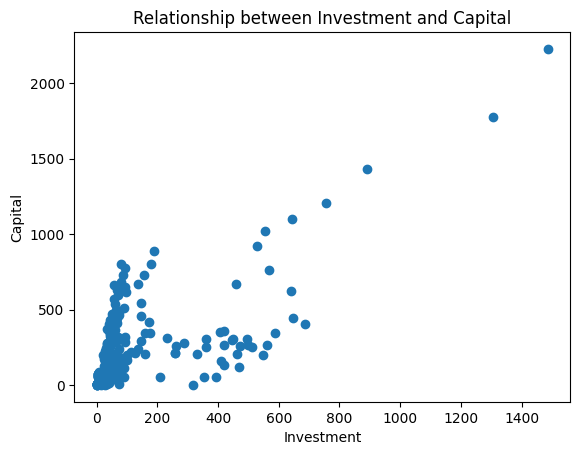

In [19]:
plt.scatter(data['invest'],data['capital'])
plt.title("Relationship between Investment and Capital")
plt.xlabel("Investment")
plt.ylabel("Capital")

General Motors    Axes(0.1,0.15;0.8x0.75)
dtype: object

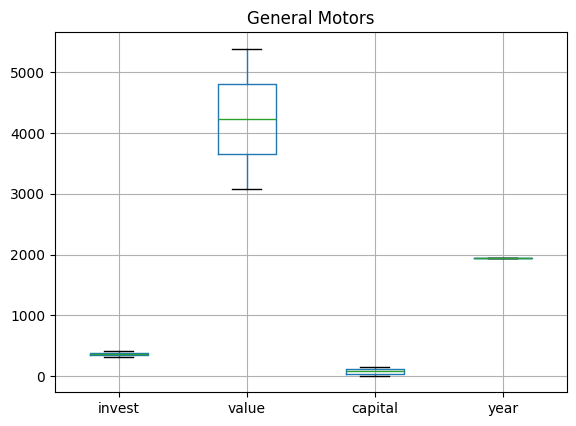

In [17]:
data.iloc[np.r_[0,2]].groupby('firm').boxplot()

In [18]:
data.columns

Index(['invest', 'value', 'capital', 'firm', 'year'], dtype='object')

In [19]:
# #Train - Test split
# index=data.sample(frac=0.05,random_state=1).index
# index

In [20]:
# train=data.drop(index,axis=0)
# train.shape

In [21]:
# test=data.iloc[index,]
# test.shape

- H0: Beta coefficients = 0 
- H1: At least one beta not equal to 0 

In [22]:
from statsmodels.formula.api import ols
mod1=ols('invest~value+capital',data).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 invest   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     487.3
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           5.58e-81
Time:                        15:37:24   Log-Likelihood:                -1301.3
No. Observations:                 220   AIC:                             2609.
Df Residuals:                     217   BIC:                             2619.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -38.4101      8.413     -4.565      0.000     -54.992     -21.828
value          0.1145      0.006     20.753      0.000       0.104       0.125
capital        0.2275      0.024      9.390      0.000       0.180       0.275
==============================================================================
Omnibus:                       33.923   Durbin-Watson:                   0.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.212
Skew:                           0.491   Prob(JB):                     5.90e-31
Kurtosis:                       6.771   Cond. No.                     2.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- IDVs `Value` and `capital` are significant as p-value<0.05
- For a unit change in it's `value` of capital stock 0.1145 increase in firm's investment.
- For a unit change in it's `capital` of capital stock 0.2275 increase in firm's investment.
- Amount of variation(R^2) in firm's investment is explained by the variation in `Value` and `capital`.

In [23]:
from statsmodels.formula.api import ols
mod=ols('np.sqrt(invest)~value+capital',data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(invest)   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     501.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           4.38e-82
Time:                        15:37:25   Log-Likelihood:                -547.78
No. Observations:                 220   AIC:                             1102.
Df Residuals:                     217   BIC:                             1112.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7075      0.274     13.540      0.000       3.168       4.247
value          0.0040      0.000     22.511      0.000       0.004       0.004
capital        0.0060      0.001      7.590      0.000       0.004       0.008
==============================================================================
Omnibus:                       40.707   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.154
Skew:                           0.943   Prob(JB):                     4.79e-17
Kurtosis:                       5.154   Cond. No.                     2.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- IDVs `Value` and `capital` are significant as p-value<0.05
- For a unit change in it's `value` of capital stock 0.004 increase in square root of firm's investment.
- For a unit change in it's `capital` of capital stock 0.006 increase in square root of firm's investment.
- Amount of variation(R^2) in firm's investment is explained by the variation in `Value` and `capital`.

In [24]:
#Residuals: Actual - predicted
residual=data['invest'] - mod.fittedvalues
residual

0      301.428127
1      368.928557
2      384.171254
3      241.450499
4      308.435182
          ...    
215      0.461040
216      2.175175
217      2.917974
218      4.600201
219      1.881368
Length: 220, dtype: float64

<Axes: >

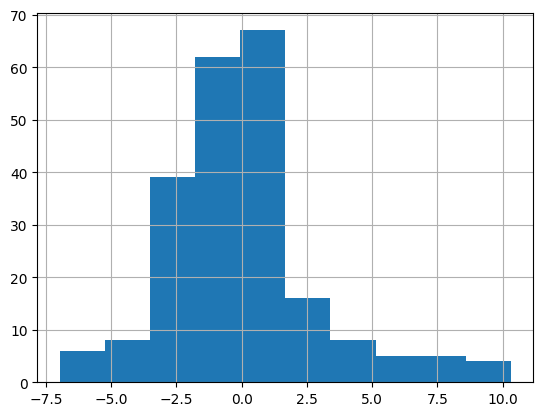

In [25]:
#Assumption check: Errors normally distributed? 
res=mod.resid
res.hist()

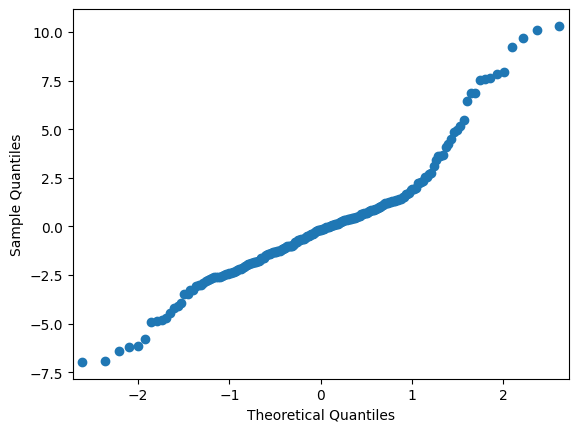

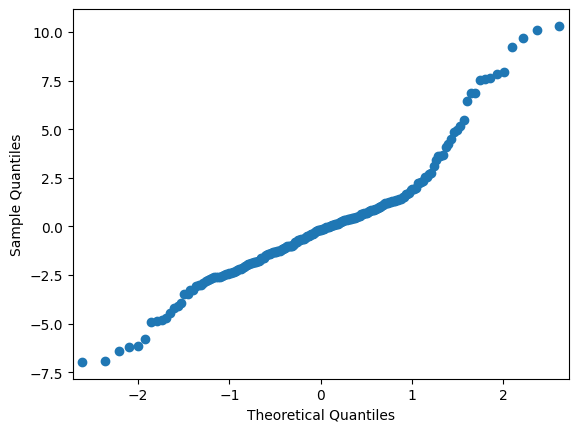

In [26]:
import statsmodels.api as sm
sm.qqplot(res)

In [27]:
#Multicollinearity check
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
idv = mod.model.exog #IDVs+intercep
vif = [variance_inflation_factor(idv, i) for i in range(idv.shape[1])]
pd.DataFrame({'Features':mod.model.exog_names,'vif':vif})

,Features,vif
0,Intercept,1.910617
1,value,1.356156
2,capital,1.356156


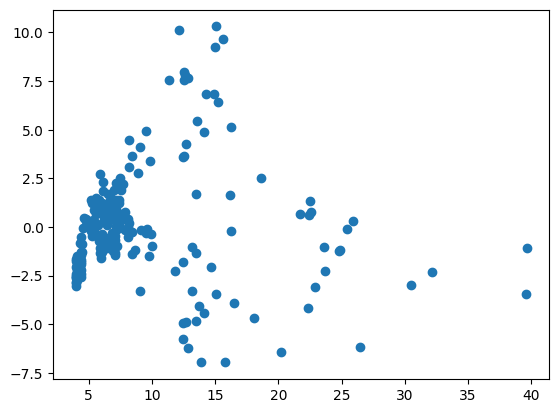

In [28]:
#Constant variance check - Homescedasticity check
plt.scatter(mod.fittedvalues,mod.resid)

In [29]:
#Test samples
test=pd.DataFrame({'value':[3000,650],'capital':[250,145]})

In [30]:
test['predicted']=mod.predict(test)**2 #Square of predicted value

In [31]:
test

,value,capital,predicted
0,3000,250,300.464095
1,650,145,51.890151


In [32]:
#ML Approach

In [33]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [34]:
X=data.drop(['invest','firm','year'],axis=1)
Y=data['invest']

In [35]:
models={'reg':LinearRegression(),'ridge':Ridge(),'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'knn':KNeighborsRegressor()}

In [36]:
params={'reg':{'fit_intercept':[True]},'ridge':{'alpha':[0.02,0.05,0.06,0.07]},'dt':{'max_depth':[2,3,4],'criterion':["squared_error","absolute_error"]},
                                               'rf':{'max_depth':[2,3,4],'n_estimators':[10,20,30]},'knn':{'n_neighbors':[2,3,5]}}

In [37]:
result={}
for m in tqdm(models.keys()):
    model=models[m]
    alg=GridSearchCV(model,param_grid=params[m],n_jobs=-1,cv=3).fit(X,Y)
    print(alg.best_params_)
    result[alg.best_estimator_]=[alg.score(X,Y)]

 20%|████████████████▊                                                                   | 1/5 [00:05<00:20,  5.12s/it]

{'fit_intercept': True}


 40%|█████████████████████████████████▌                                                  | 2/5 [00:09<00:13,  4.39s/it]

{'alpha': 0.07}


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:09<00:05,  2.50s/it]

{'criterion': 'absolute_error', 'max_depth': 4}


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.03s/it]

{'max_depth': 4, 'n_estimators': 10}
{'n_neighbors': 5}


In [38]:
result[str(type(mod.model))]=mod.rsquared

In [39]:
result

{LinearRegression(): [0.8178870315420232],
 Ridge(alpha=0.07): [0.8178870315420232],
 DecisionTreeRegressor(criterion='absolute_error', max_depth=4): [0.8898680286636299],
 RandomForestRegressor(max_depth=4, n_estimators=10): [0.9124312134071394],
 KNeighborsRegressor(): [0.8514099753395432],
 "<class 'statsmodels.regression.linear_model.OLS'>": np.float64(0.8221104838952498)}

In [40]:
r=pd.DataFrame(result).T
r=r.reset_index()
r.columns=['Model','R-Squared']

In [44]:
r=r.sort_values('R-Squared',ascending=False)

In [47]:
r.style.background_gradient(cmap='viridis')

,Model,R-Squared
3,"RandomForestRegressor(max_depth=4, n_estimators=10)",0.912431
2,"DecisionTreeRegressor(criterion='absolute_error', max_depth=4)",0.889868
4,KNeighborsRegressor(),0.851410
5,,0.822110
1,Ridge(alpha=0.07),0.817887
0,LinearRegression(),0.817887


In [50]:
cm = sns.light_palette("green", as_cmap=True)

r.style.background_gradient(cmap=cm)

,Model,R-Squared
3,"RandomForestRegressor(max_depth=4, n_estimators=10)",0.912431
2,"DecisionTreeRegressor(criterion='absolute_error', max_depth=4)",0.889868
4,KNeighborsRegressor(),0.851410
5,,0.822110
1,Ridge(alpha=0.07),0.817887
0,LinearRegression(),0.817887
